### Stochastic Block Models

I gave ChatGPT the paper by Holland et al. and the paper by Girvan-Newman, and asked for a summary of the differences. Here's what it came up with.

| Feature                         | Stochastic Block Model (SBM)          | Girvan-Newman Network Formation Model |
|---------------------------------|--------------------------------------|--------------------------------------|
| **Generative Process**         | Nodes are assigned to communities in advance | Network structure emerges from preferential attachment |
| **Edge Probability**           | Based only on group membership       | Based on assortative mixing, linking nodes with similar attributes |
| **Fixed vs. Dynamic**          | Static model: All nodes exist at the start, edges are drawn probabilistically | Growth model: Nodes and edges are added over time |
| **Flexibility**                | Assumes block structure; works well for well-separated communities | Can produce overlapping and evolving community structures |
| **Assortativity**              | Can incorporate assortativity but is not its primary feature | Explicitly models assortative mixing in real-world networks |

Let's discuss each

---

### Holland, Laskey, Leinhardt Stochastic Block Model

This algorithm defines 
- a set of groups
- the number of nodes within each group
- the probability of an edge between nodes for each group pair, denoted by p[i,j] for groups i and j

The algorithm is very straightforward.
- create a graph with nodes assigned to each group
- create the set of all possible edges
- for each possible edge
  - if the possible edge is between nodes in group i and group j AND
      - add the edge to the graph if a random number is less than p[i,j]

We can implement this for an undirected graph with no self-loops.


In [3]:
############
## Cell 1 ##
############

import networkx as nx
from drawing_utilities import show_partitions
from drawing_utilities import show_dendrogram
from drawing_utilities import show_graph
from drawing_utilities import show_partitions_with_scaled_nodesize


def generate_holland_stochastic_block_graph() -> nx.Graph:
    nodes_per_group: list[int] = [20, 20, 25]
    p: list[list[int, int]] = [[0.2, 0.01, 0.05],
                               [0.01, 0.3, 0.01],
                               [0.05, 0.01, 0.2]]
    return nx.stochastic_block_model(nodes_per_group, p, seed=42)


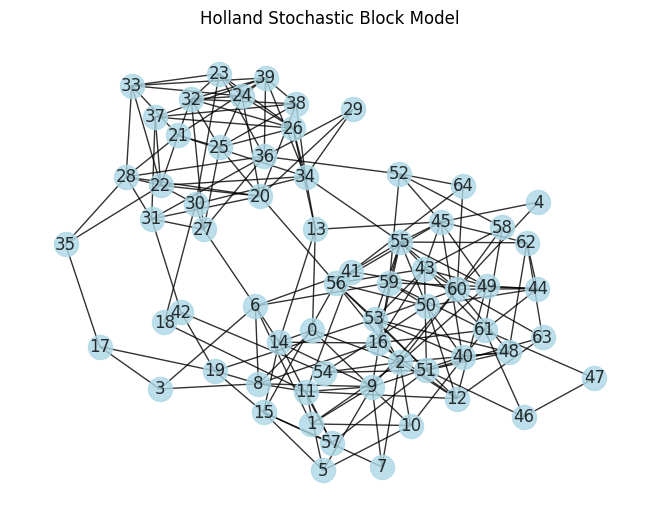

In [4]:
############
## Cell 2 ##
############
G = generate_holland_stochastic_block_graph()
show_graph(G, title = "Holland Stochastic Block Model")


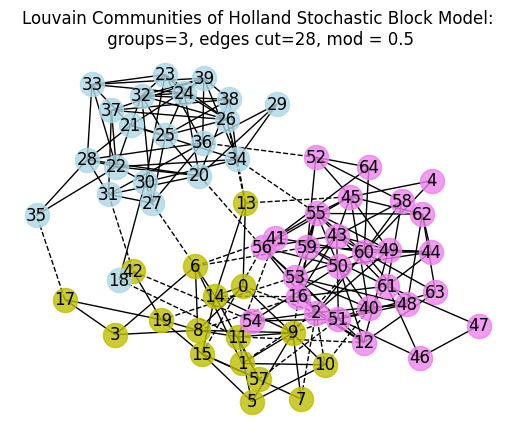

In [5]:
############
## Cell 3 ##
############
partitions = nx.community.louvain_communities(G, seed=42)
show_partitions(G, partition=partitions, title="Louvain Communities of Holland Stochastic Block Model:\n")

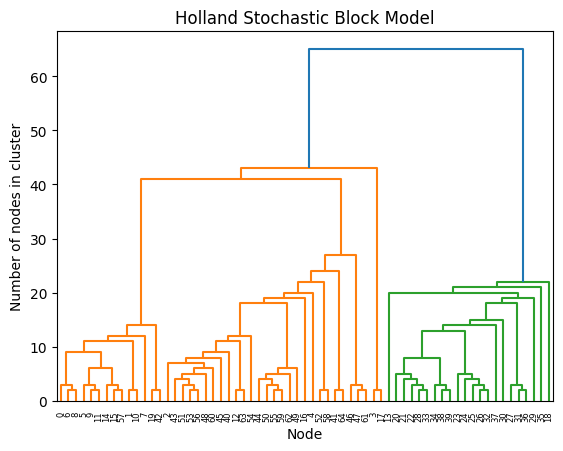

In [6]:
############
## Cell 4 ##
############
show_dendrogram(G, title="Holland Stochastic Block Model")

The algorithm is very straightforward. I'll write my code to emphasize teaching rather than code efficiency. Let's start by writing a loop that iterates through each possible pairing of groups and generates all possible edges. I'll do this for small graphs so that we can see the pattern.

In [7]:
############
## Cell 5 ##
############

from itertools import combinations_with_replacement
import random

def create_node_groups(nodes_per_group: list[int]) -> dict[int, set[int]]:
    node_groups: dict[int, set[int]] = dict()
    start_node = 0

    for group_index in range(len(nodes_per_group)):
        group_size = nodes_per_group[group_index]
        group = set(range(start_node, start_node + group_size))
        node_groups[group_index] = group
        start_node += group_size

    return node_groups

nodes_per_group: list[int] = [4,4,5]
node_groups: dict[int, list[int]] = create_node_groups(nodes_per_group)
print(node_groups)


{0: {0, 1, 2, 3}, 1: {4, 5, 6, 7}, 2: {8, 9, 10, 11, 12}}


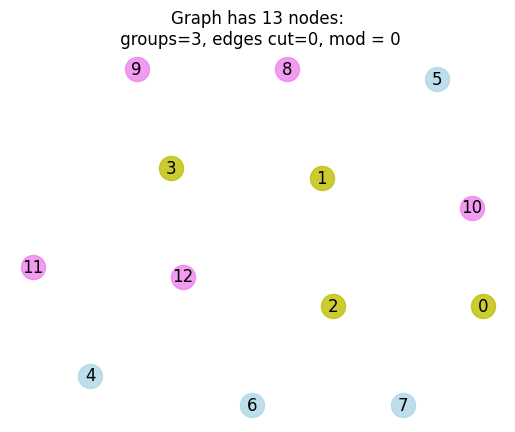

In [8]:
############
## Cell 6 ##
############
G: nx.Graph = nx.Graph()
nx.Graph.add_nodes_from(G,list(range(sum(nodes_per_group))))
partition: tuple[set[int]] = [group for  group in node_groups.values()]
show_partitions(G, partition=partition, title=f"Graph has {len(G)} nodes:\n")

In [9]:
############
## Cell 7 ##
############
prob_edge: list[list[int, int]] = [[0.2, 0.01, 0.02],
                            [0.01, 0.3, 0.01],
                            [0.02, 0.01, 0.2]]
random_number_generator: random.Random = random.Random()
random_number_generator.seed(1234)
for i,j in combinations_with_replacement(range(len(nodes_per_group)), 2):
    print(f"edges between group {i} and group {j}")
    edges: list[tuple[int, int]] = []
    for node1 in partition[i]:
        for node2 in partition[j]:
            edges.append((node1, node2))
    print(f"\tp = {prob_edge[i][j]}")
    for edge in edges:
        r: float = random_number_generator.uniform(0,1)
        if r < prob_edge[i][j]:
            print(f"\t\t add edge {edge}? yes since r = {r} < p = {prob_edge[i][j]}")
            G.add_edge(edge[0], edge[1]) 
        else:
            print(f"\t\t add edge {edge}? no since r = {r} > p = {prob_edge[i][j]}")


edges between group 0 and group 0
	p = 0.2
		 add edge (0, 0)? no since r = 0.9664535356921388 > p = 0.2
		 add edge (0, 1)? no since r = 0.4407325991753527 > p = 0.2
		 add edge (0, 2)? yes since r = 0.007491470058587191 < p = 0.2
		 add edge (0, 3)? no since r = 0.9109759624491242 > p = 0.2
		 add edge (1, 0)? no since r = 0.939268997363764 > p = 0.2
		 add edge (1, 1)? no since r = 0.5822275730589491 > p = 0.2
		 add edge (1, 2)? no since r = 0.6715634814879851 > p = 0.2
		 add edge (1, 3)? yes since r = 0.08393822683708396 < p = 0.2
		 add edge (2, 0)? no since r = 0.7664809327917963 > p = 0.2
		 add edge (2, 1)? no since r = 0.23680977536311776 > p = 0.2
		 add edge (2, 2)? yes since r = 0.030814021726609964 < p = 0.2
		 add edge (2, 3)? no since r = 0.7887727172362835 > p = 0.2
		 add edge (3, 0)? no since r = 0.3460889655971231 > p = 0.2
		 add edge (3, 1)? no since r = 0.6232814750391685 > p = 0.2
		 add edge (3, 2)? no since r = 0.6158156951036152 > p = 0.2
		 add edge (3, 3)?

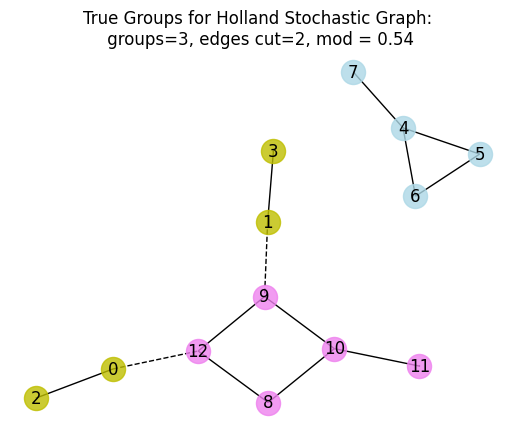

In [10]:
############
## Cell 9 ##
############
show_partitions(G, partition=partition, title="True Groups for Holland Stochastic Graph:\n")

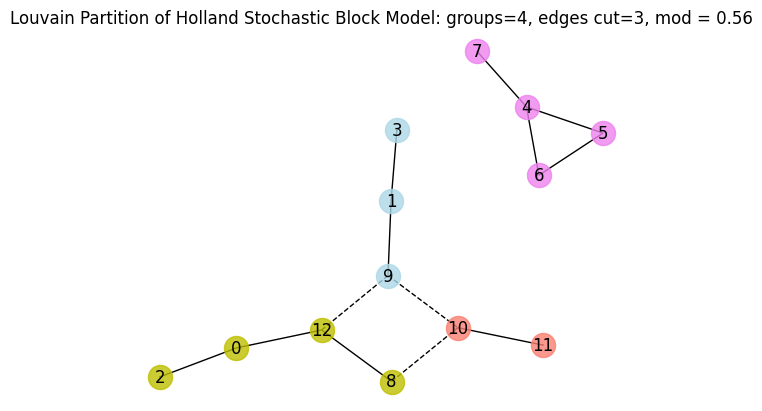

In [11]:
partition: list[set[int]] = nx.community.louvain_communities(G,seed = 42)
show_partitions(G, partition=partition, title = "Louvain Partition of Holland Stochastic Block Model:")

More nodes

Num Edges = 176


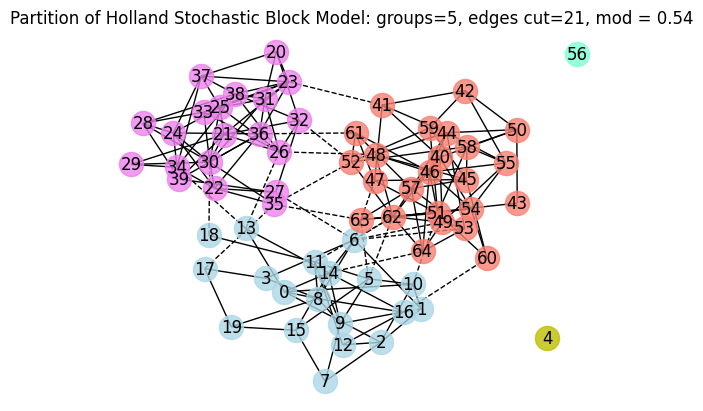

In [12]:
nodes_per_group = [20, 20, 25]
G = nx.stochastic_block_model(nodes_per_group, prob_edge, seed=42)
partition: list[set[int]] = nx.community.louvain_communities(G,seed = 42)
show_partitions(G, partition=partition, title = "Partition of Holland Stochastic Block Model:")
num_edges: int = len(G.edges())
print(f"Num Edges = {num_edges}")

---

#### Is Holland's Model Assortative (in Degree)?

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def show_degree_vs_neighbor_degree(G: nx.Graph) -> None:
    degree = dict(G.degree())

    # Compute average neighbor degree
    avg_neighbor_degree = nx.average_neighbor_degree(G)

    # Scatter plot: degree vs. average neighbor degree
    plt.figure(figsize=(8, 6))
    plt.scatter(degree.values(), avg_neighbor_degree.values(), alpha=0.7)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Node Degree")
    plt.ylabel("Average Neighbor Degree")
    title: str = f"Holland Model: Node Degree vs. Average Neighbor Degree:\nAssortativity = {np.round(nx.degree_assortativity_coefficient(G),2)}"
    plt.title(title)
    plt.grid(True)
    plt.show()

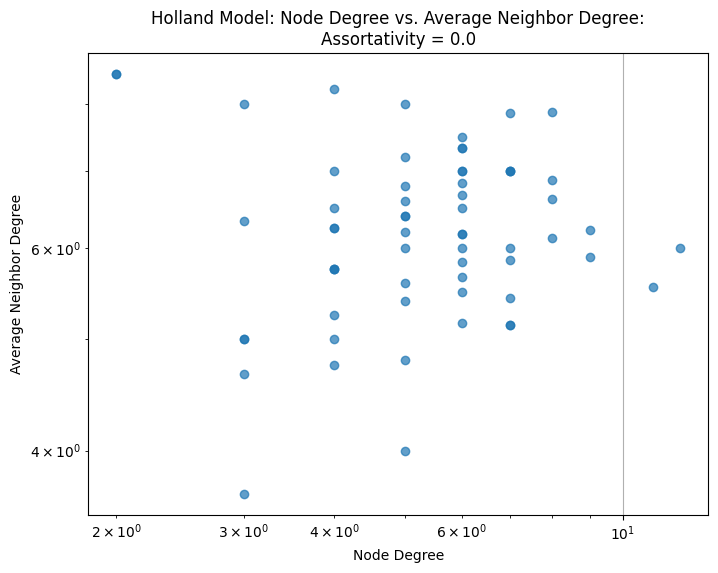

In [14]:
show_degree_vs_neighbor_degree(G)

Show plot with node size proportional do degree

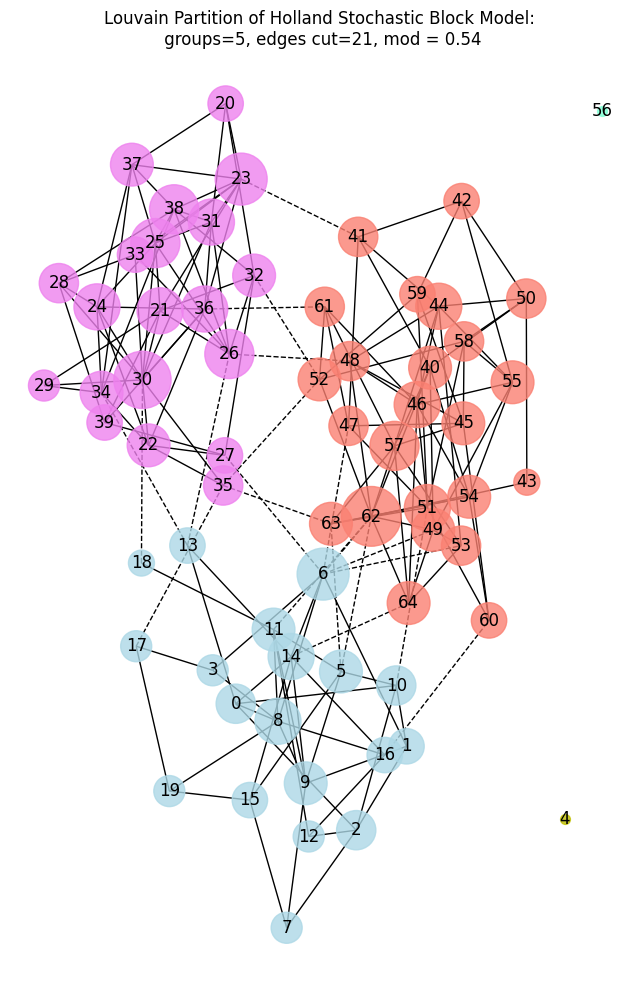

In [15]:
show_partitions_with_scaled_nodesize(G, partition, title="Louvain Partition of Holland Stochastic Block Model:\n")

---

### Girvan-Newman Stochastic Block Model


In [16]:
from Girvan_Newman_stochastic_block_network_v2 import AssortativeMixing
mixed_network: AssortativeMixing = AssortativeMixing()
G = mixed_network.G

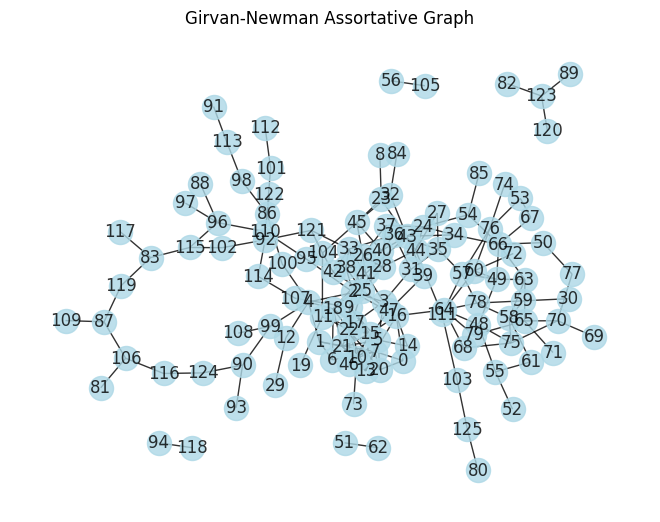

In [17]:
show_graph(G, title = "Girvan-Newman Assortative Graph")

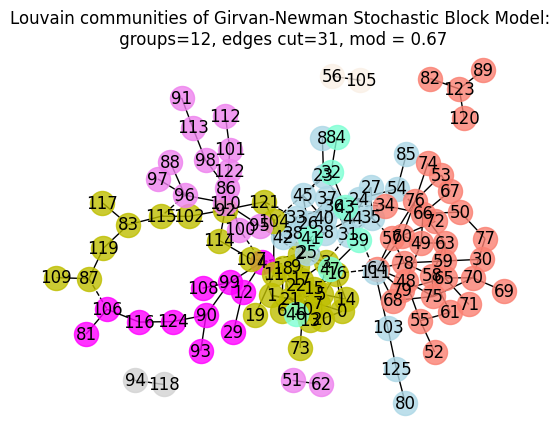

In [18]:
partition: list[set[int]] = nx.community.louvain_communities(G,seed = 42)
show_partitions(G, partition=partition, title = "Louvain communities of Girvan-Newman Stochastic Block Model:\n")

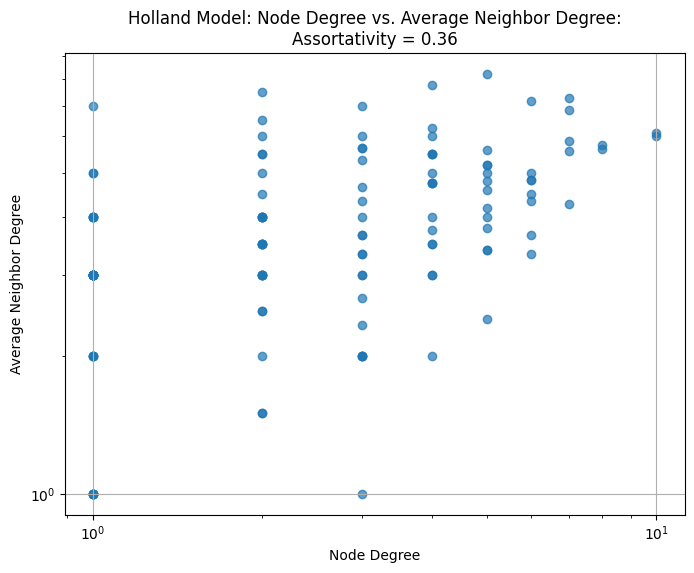

In [19]:
show_degree_vs_neighbor_degree(G)

Number of edges = 200


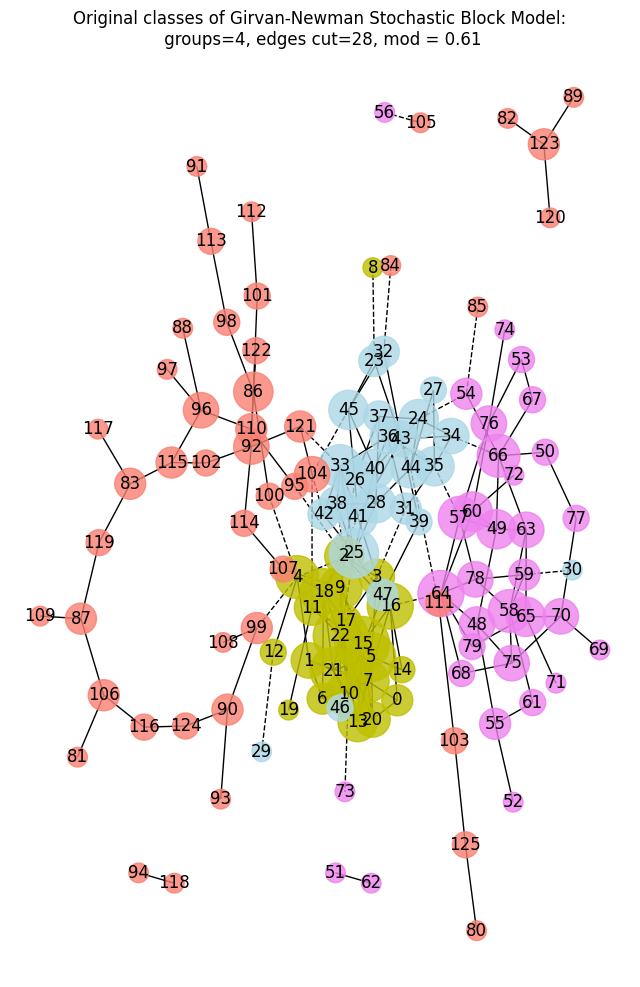

In [20]:
#%load_ext autoreload
#%autoreload 2
#from partitioning_utilities import show_partitions_with_scaled_nodesize

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions_with_scaled_nodesize(G, partition, title="Original classes of Girvan-Newman Stochastic Block Model:\n")

print(f"Number of edges = {len(G.edges())}")

---

Practice


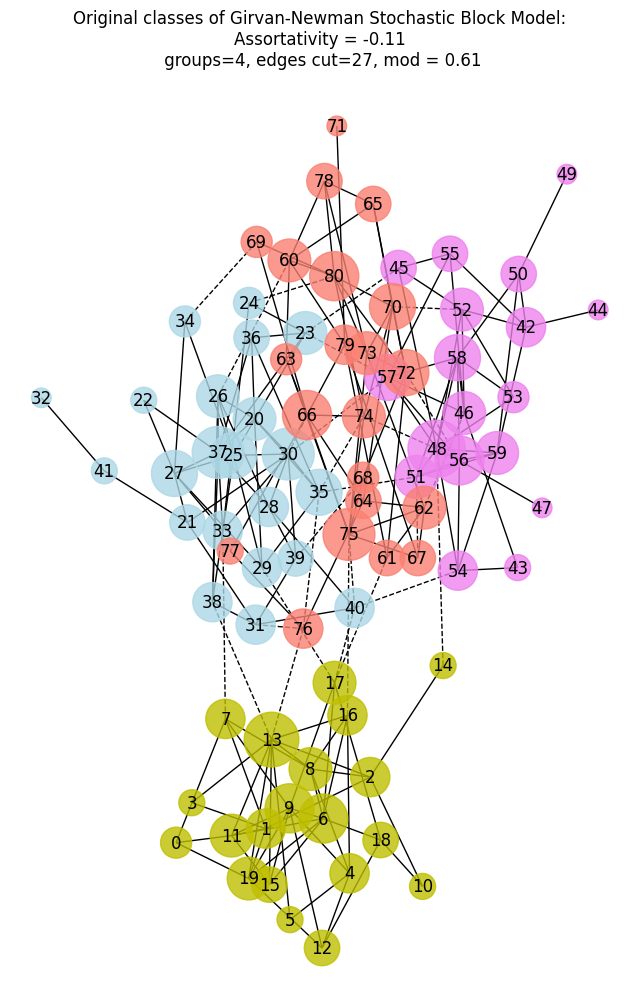

In [21]:
#############
## Cell 10 ##
#############

M = np.array([[0.4, 0.02, 0.01, 0.03],
[0.02, 0.4, 0.03, 0.02],
[0.01, 0.03, 0.4, 0.01],
[0.03, 0.02, 0.01, 0.4]]) 

poisson_lambda = [5, 5, 5, 5]
# Try 
# poisson_lambda = [8, 4, 3, 2]
num_edges = 200
# Try
# num_edges = 300
# num_edges = 300

mixed_network: AssortativeMixing = AssortativeMixing(M, poisson_lambda, num_edges=num_edges)
G = mixed_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions_with_scaled_nodesize(G, partition, title=f"Original classes of Girvan-Newman Stochastic Block Model:\nAssortativity = {np.round(nx.degree_assortativity_coefficient(G),2)}\n")


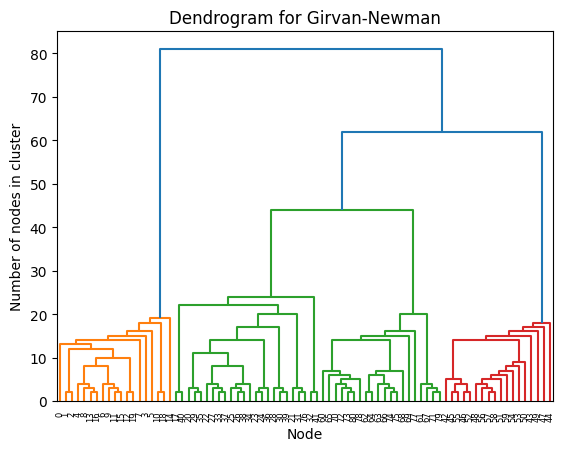

In [22]:
#############
## Cell 11 ##
#############

show_dendrogram(G, title="Dendrogram for Girvan-Newman")